# S-03_analisis_negocio_Marketing

## Librerías

In [67]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # per poder utilitzar FuncFormatter i aplicar format a la barra
import geopandas as gpd
import time
import folium
import os
import re
from mysql.connector import errorcode
from dotenv import load_dotenv # type: ignore # per dades accedir base dades
from datetime import datetime
from matplotlib.ticker import FuncFormatter # per poder utilitzar el separador de milersimport geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from geopy.exc import GeocoderTimedOut
from folium.plugins import MarkerCluster
from tabulate import tabulate # para formato de una tabla
from scipy.stats import skew
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer

#Librería para gráficos interactivos en python
import plotly.graph_objects as go
import plotly.express as px

#Librería test de hipótesis
from scipy.stats import ttest_ind
from scipy import stats

from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict, Counter

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Utilizar el fichero CSV

In [3]:

# Ruta relativa al fitxer dins del repositori Git
csv_path = "../Data/2025_04_28_Sprint03.csv"

try:
    # Carregar el CSV com a DataFrame
    df = pd.read_csv(csv_path)
    print(f"Arxiu carregat correctament: {csv_path}")
    
    # Diccionari per simular múltiples DataFrames si cal
    DataFrames = {"df2025_04_28_Sprint03": df}
    print(DataFrames.keys())
    
    # Opcional: exposar el DataFrame com a variable local
    locals().update(DataFrames)

except FileNotFoundError:
    print(f"No s'ha trobat l'arxiu: {csv_path}")
except Exception as e:
    print(f"S'ha produït un error en llegir el CSV: {e}")

Arxiu carregat correctament: ../Data/2025_04_28_Sprint03.csv
dict_keys(['df2025_04_28_Sprint03'])


## Visualización df

In [4]:
df


,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
0,15248525,"appt dans villa � Llansa ,beau jardin,terrasse",Mon logement est proche de la plage et des com...,84213236,Llan��,NaN,Entire home/apt,6,1.0,2.0,...,66.0,spain,girona,2021-02-27,"air conditioning, balcony, bathroom essentials...",0,0.000000,True,27,"childrenu2019s books and toys, cleaning before..."
1,44391173,Hostal Escadarcs 1780,"Peque�o hostal construido de 1780, situado en ...",358199210,Fontanals de Cerdanya,NaN,Private room,16,0.0,2.0,...,NaN,spain,girona,2021-02-27,"air conditioning, bathroom essentials, bathroo...",0,0.000000,False,10,"essentials, fire extinguisher, hair dryer, han..."
2,32088176,"Two-level apartment, wifi, terrace, swimming pool","Authentic 2 level apartment, located on the su...",240662122,Lloret de Mar,NaN,Entire home/apt,4,1.0,1.0,...,57.0,spain,girona,2021-02-27,"24-hour check-in, balcony, bathroom essentials...",30,100.000000,True,29,"coffee maker, cooking basics, dedicated worksp..."
3,45803831,Villa Solecito at Illes Balears,Villa Solecito provides a most comfortable and...,345010290,Mah�n,NaN,Entire home/apt,12,6.0,6.0,...,NaN,spain,menorca,2021-02-27,"air conditioning, bathroom essentials, bathroo...",29,96.666667,False,22,"air conditioning, bed linens, cable tv, coffee..."
4,43993521,"Apartment Sant Lluis,2 minutes walk from the b...",Apartments located in the central part of Llor...,59318446,Lloret de Mar,NaN,Entire home/apt,6,1.0,2.0,...,29.0,spain,girona,2021-02-27,"air conditioning, bathroom essentials, bathroo...",3,10.000000,True,23,"air conditioning, bed linens, carbon monoxide ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,13707226,"Remarkable Value, Unbeatable Location",A spacious double bedroom with a balcony. It's...,80008404,el Barri G�tic,Ciutat Vella,Private room,2,4.0,1.0,...,25.0,spain,barcelona,2017-01-04,"air conditioning, bathroom essentials, bathroo...",0,0.000000,True,20,"air conditioning, buzzer/wireless intercom, dr..."
9646,15713525,Nice room in classic eixample flat with balcony,"Lugares de inter�s: Cervecer�a Catalana, Casa ...",3297768,l'Antiga Esquerra de l'Eixample,Eixample,Private room,1,2.0,1.0,...,52.0,spain,barcelona,2017-01-04,"bathroom essentials, bathroom extras, dining a...",30,100.000000,True,18,"breakfast, carbon monoxide detector, dryer, el..."
9647,544995,LUXURY HOUSE IN BCN NEAR THE BEACH,SPECIAL OFFER! LUXURY HOUSE IN BCN NEAR THE BE...,2556699,la Vila Ol�mpica del Poblenou,Sant Mart�,Entire home/apt,6,3.0,3.0,...,39.0,spain,barcelona,2017-01-04,"24-hour check-in, air conditioning, bathroom e...",0,0.000000,True,20,"24-hour check-in, air conditioning, buzzer/wir..."
9648,1346199,Duplex Loft near Beach - Groups Offer,Large loft 110m� fully renovated and furnished...,6614322,el Parc i la Llacuna del Poblenou,Sant Mart�,Entire home/apt,10,1.0,2.0,...,NaN,spain,barcelona,2017-01-04,"elevator, family friendly, internet, kitchen, ...",0,0.000000,False,5,"elevator in building, family/kid friendly, kit..."


## Descripción

In [5]:
df.describe()

,apartment_id,host_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_occupied,occupancy_rate,amenities_count
count,9.650000e+03,9.650000e+03,9650.000000,9584.000000,9583.000000,9605.000000,9650.000000,9650.000000,9650.000000,9650.000000,...,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,9650.000000,9650.000000,9650.000000
mean,2.122473e+07,9.097918e+07,4.266943,1.593176,1.936137,2.922853,1035.132746,4.966839,759.591710,12.998031,...,94.429114,93.109954,96.197381,96.172040,95.392088,91.351542,123.703224,17.001969,56.673230,21.123109
std,1.161793e+07,8.717279e+07,2.589438,0.989921,1.376250,2.269252,953.530927,17.986249,498.500306,11.824935,...,9.429369,9.956263,8.212464,8.296275,7.670736,9.935197,153.172140,11.824935,39.416451,10.644598
min,1.196400e+04,1.070400e+04,1.000000,0.000000,0.000000,0.000000,60.000000,1.000000,1.000000,0.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,0.000000,0.000000,1.000000
25%,1.332096e+07,1.506455e+07,2.000000,1.000000,1.000000,1.000000,450.000000,1.000000,62.000000,0.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,18.000000,4.000000,13.333333,13.000000
50%,2.065612e+07,6.569780e+07,4.000000,1.000000,2.000000,2.000000,750.000000,2.000000,1125.000000,11.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,58.000000,19.000000,63.333333,19.000000
75%,3.016933e+07,1.429782e+08,6.000000,2.000000,3.000000,4.000000,1250.000000,4.000000,1125.000000,26.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,177.000000,30.000000,100.000000,27.000000
max,4.806155e+07,3.874783e+08,29.000000,13.000000,50.000000,30.000000,28571.000000,1125.000000,1125.000000,30.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1291.000000,30.000000,100.000000,99.000000


## Ver columnas con más valores nulos

In [6]:
print(df.isnull().sum().sort_values(ascending=False).head(10))


neighbourhood_district         3790
review_scores_checkin          2547
reviews_per_month              2547
review_scores_cleanliness      2547
review_scores_accuracy         2547
review_scores_rating           2547
first_review_date              2547
review_scores_location         2547
review_scores_communication    2547
review_scores_value            2547
dtype: int64


## Prengunta de negocio Sprint-3 Marketing
    Analista de Màrqueting i Estratègia Comercial: Quines ciutat i barris presenten un potencial d'optimització més gran considerant les ressenyes, la puntuació de la zona i la disponibilitat mínima/màxima de nits?

### Interpretar la pregunta
    Objetivo: Identificar ciudades y barrios con mayor potencial de optimización.
    
    Criterios considerados:
        Ressenyes (número y/o frecuencia)
        Puntuació de la zona (si está en el dataset, o debes calcularla/estimar)
        Disponibilitat mínima i màxima de nits (nights minimum / maximum)
    Optimización = posibilidad de mejora, por lo tanto:
        Lugares con alta demanda (muchas reseñas) pero restricciones subóptimas (por ejemplo, estancias mínimas largas que podrían reducir ocupación)
        Lugares con baja ocupación pero buena puntuación de zona (potencial mal aprovechado)    

## Preparar los datos
    Filtrar columnas clave: city, neighbourhood_name, reviews_per_month, occupancy_rate, minimum_nights, maximum_nights.
    Limpiar NaN o valores extremos

In [7]:
df_filtered = df[[
    'city', 'neighbourhood_name', 'reviews_per_month',
    'occupancy_rate', 'minimum_nights', 'maximum_nights'
]].dropna()

In [8]:
df_filtered.head(10)

,city,neighbourhood_name,reviews_per_month,occupancy_rate,minimum_nights,maximum_nights
0,girona,Llan��,66.0,0.000000,2,1125
2,girona,Lloret de Mar,57.0,100.000000,6,62
4,girona,Lloret de Mar,29.0,10.000000,1,50
6,girona,Llan��,28.0,100.000000,6,20
9,girona,Castell-Platja d'Aro,101.0,3.333333,2,1125
10,girona,Blanes,25.0,3.333333,5,85
11,malaga,Centro,245.0,100.000000,1,1125
12,sevilla,Santa Cruz,11.0,10.000000,1,1125
14,girona,L'Escala,55.0,100.000000,2,1125
15,menorca,Ciutadella de Menorca,3.0,3.333333,7,1125


## Segunda preparación de los datos
    Filtrar columnas clave: city, neighbourhood_name, review_scores_rating, review_scores_location, occupancy_rate, minimum_nights, maximum_nights.
    Limpiar NaN o valores extremos

In [52]:
df_filtered_2 = df[[
    'city', 'neighbourhood_name', 'reviews_per_month', 'review_scores_rating', 
    'review_scores_location', 'occupancy_rate', 'minimum_nights', 'maximum_nights']].dropna()

df_filtered_2.head(10)


,city,neighbourhood_name,reviews_per_month,review_scores_rating,review_scores_location,occupancy_rate,minimum_nights,maximum_nights
0,girona,Llan��,66.0,960.0,100.0,0.000000,2,1125
2,girona,Lloret de Mar,57.0,970.0,100.0,100.000000,6,62
4,girona,Lloret de Mar,29.0,1000.0,100.0,10.000000,1,50
6,girona,Llan��,28.0,900.0,100.0,100.000000,6,20
9,girona,Castell-Platja d'Aro,101.0,940.0,100.0,3.333333,2,1125
10,girona,Blanes,25.0,960.0,90.0,3.333333,5,85
11,malaga,Centro,245.0,920.0,100.0,100.000000,1,1125
12,sevilla,Santa Cruz,11.0,930.0,100.0,10.000000,1,1125
14,girona,L'Escala,55.0,930.0,100.0,100.000000,2,1125
15,menorca,Ciutadella de Menorca,3.0,920.0,100.0,3.333333,7,1125


## Posible métrica de "potencial de optimización"
✅ Ventajas:
* Fácil de interpretar.
* Detecta propiedades con baja ocupación pero que reciben cierto tráfico (reseñas), y penaliza las estancias mínimas largas.

❌ Limitaciones:
* No tiene en cuenta la ubicación ni la calidad percibida del alojamiento.
* Puede dar puntajes altos a propiedades en zonas malas o ya saturadas, simplemente por tener muchas reseñas.

In [10]:
df_filtered['optimization_score'] = ((1 - df_filtered['occupancy_rate']) * df_filtered['reviews_per_month']) / (df_filtered['minimum_nights'] + 1)

df_filtered['optimization_score'].head(10)

0        22.000000
2      -806.142857
4      -130.500000
6      -396.000000
9       -78.555556
10       -9.722222
11   -12127.500000
12      -49.500000
14    -1815.000000
15       -0.875000
Name: optimization_score, dtype: float64

## Posible segunda métrica de "potencial de optimización"
✅ Ventajas:
* Incluye contexto de la zona (review_scores_location): detecta si la ubicación es buena.
* Considera la calidad general del alojamiento con review_scores_rating.
* Mejor equilibrio entre oferta y demanda: se penaliza si el alojamiento tiene mala reputación o está en una zona poco atractiva.
* Más alineado con un modelo de priorización estratégica real.

❌ Desventajas:
* Más complejo y requiere más limpieza de datos (asegurar que review_scores_rating y location no tengan nulos).
* Los valores extremos (muy bajos en rating) pueden sesgar el resultado si no se normaliza.

In [57]:
df_filtered_2['optimization_score'] = ((1 - df_filtered_2['occupancy_rate']) * df_filtered_2['reviews_per_month'] * df_filtered_2['review_scores_location'] * 
                                       (10 - df_filtered_2['review_scores_rating'])) / (df_filtered_2['minimum_nights'] + 1)

df_filtered_2['optimization_score'].head(10)

0    -2.090000e+06
2     7.738971e+07
4     1.291950e+07
6     3.524400e+07
9     7.305667e+06
10    8.312500e+05
11    1.103602e+09
12    4.554000e+06
14    1.669800e+08
15    7.962500e+04
Name: optimization_score, dtype: float64

In [58]:
print(df_filtered_2[['optimization_score']].head())

   optimization_score
0       -2.090000e+06
2        7.738971e+07
4        1.291950e+07
6        3.524400e+07
9        7.305667e+06


In [ ]:
# Para normalizar el score entre 0 y 1 manteniendo las proporciones relativas y hacer los números comparables entre barrios.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_filtered_2['optimization_score_scaled'] = scaler.fit_transform(df_filtered_2[['optimization_score']])

df_filtered_2[['city', 'neighbourhood_name', 'optimization_score_scaled']]


,city,neighbourhood_name,optimization_score_scaled
0,girona,Llan��,0.008296
2,girona,Lloret de Mar,0.026132
4,girona,Lloret de Mar,0.011665
6,girona,Llan��,0.016674
9,girona,Castell-Platja d'Aro,0.010405
10,girona,Blanes,0.008952
11,malaga,Centro,0.256422
12,sevilla,Santa Cruz,0.009787
14,girona,L'Escala,0.046237
15,menorca,Ciutadella de Menorca,0.008783


## Agrupar por ciudad y calcular la media del score optimizado:

In [60]:
grouped_by_city = df_filtered_2.groupby('city')[['optimization_score_scaled']].mean().reset_index()
grouped_by_city = grouped_by_city.sort_values(by='optimization_score_scaled', ascending=False)
print(grouped_by_city)


        city  optimization_score_scaled
6    sevilla                   0.090952
2     madrid                   0.080128
3     malaga                   0.075811
7   valencia                   0.066787
0  barcelona                   0.066103
4   mallorca                   0.027667
1     girona                   0.025922
5    menorca                   0.018373


## Agrupar por ciudad y barrio

In [13]:
agg_df = df_filtered.groupby(['city', 'neighbourhood_name']).agg({'optimization_score': 'mean'}).sort_values(by='optimization_score', ascending=False)

agg_df

optimization_score
city     neighbourhood_name                                         
madrid   Los Rosales                                      132.000000
valencia SANT LLORENS                                      77.500000
mallorca Santa Mar�a del Cam�                              32.000000
girona   Riells i Viabrea                                  30.333333
         Palau de Santa Eul�lia                            22.500000
...                                                              ...
madrid   Casco Hist�rico de Barajas                    -14974.611111
sevilla  Doctor Barraquer, G. Renfe, Policl�nico       -17829.583333
         San Jos� Obrero                               -22383.500000
madrid   Tim�n                                         -31740.166667
         Butarque                                      -35588.000000

[487 rows x 1 columns]

## Segunda agrupación por ciudad y barrio

In [14]:
agg_df_2 = df_filtered_2.groupby(['city', 'neighbourhood_name'])['optimization_score_scaled'].mean().reset_index().sort_values(by='optimization_score_scaled', ascending=False)

agg_df_2

,city,neighbourhood_name,optimization_score_scaled
203,madrid,Butarque,0.698774
285,madrid,Tim�n,0.671179
405,sevilla,San Jos� Obrero,0.415630
375,sevilla,"Doctor Barraquer, G. Renfe, Policl�nico",0.343657
208,madrid,Casco Hist�rico de Barajas,0.327999
...,...,...,...
1,barcelona,Can Peguera,0.008293
145,girona,Riells i Viabrea,0.008183
348,mallorca,Santa Mar�a del Cam�,0.008098
479,valencia,SANT LLORENS,0.007310


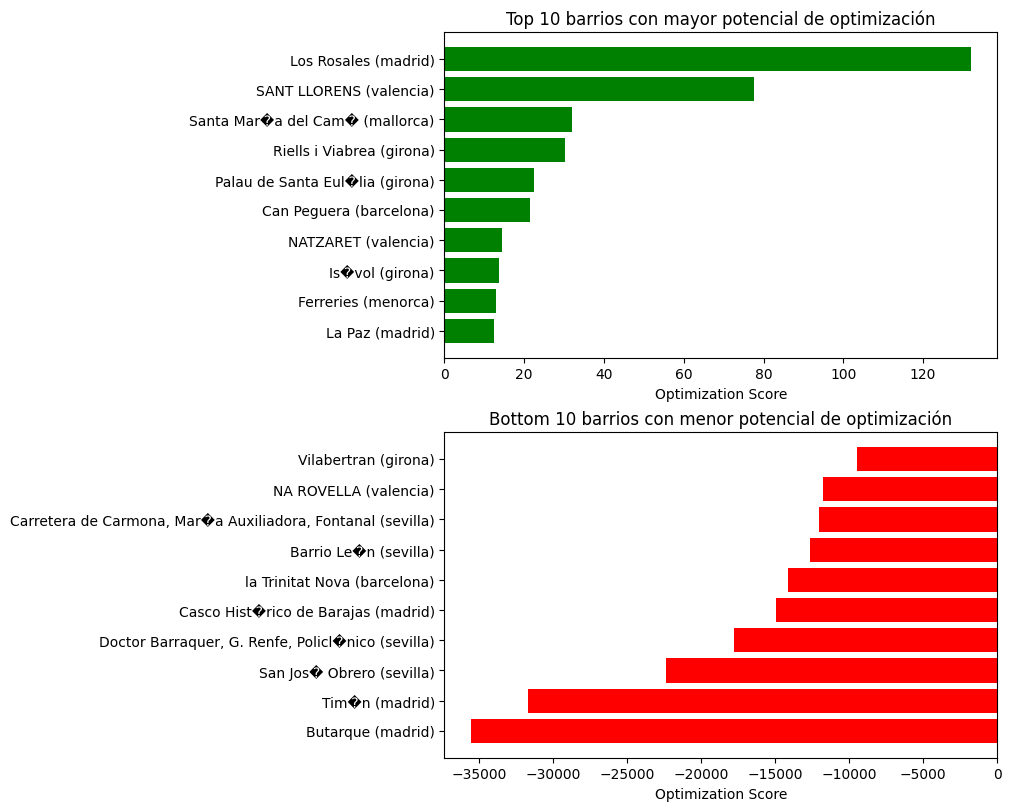

In [15]:
# Resetear el índice para acceder a las columnas como datos
agg_df_reset = agg_df.reset_index()

# Top 10 y Bottom 10
top10 = agg_df_reset.head(10)
bottom10 = agg_df_reset.tail(10)

# Gráfico
fig, ax = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

# Top 10
ax[0].barh(top10['neighbourhood_name'] + " (" + top10['city'] + ")", top10['optimization_score'], color='green')
ax[0].set_title('Top 10 barrios con mayor potencial de optimización')
ax[0].invert_yaxis()
ax[0].set_xlabel('Optimization Score')

# Bottom 10
ax[1].barh(bottom10['neighbourhood_name'] + " (" + bottom10['city'] + ")", bottom10['optimization_score'], color='red')
ax[1].set_title('Bottom 10 barrios con menor potencial de optimización')
ax[1].invert_yaxis()
ax[1].set_xlabel('Optimization Score')

plt.show()


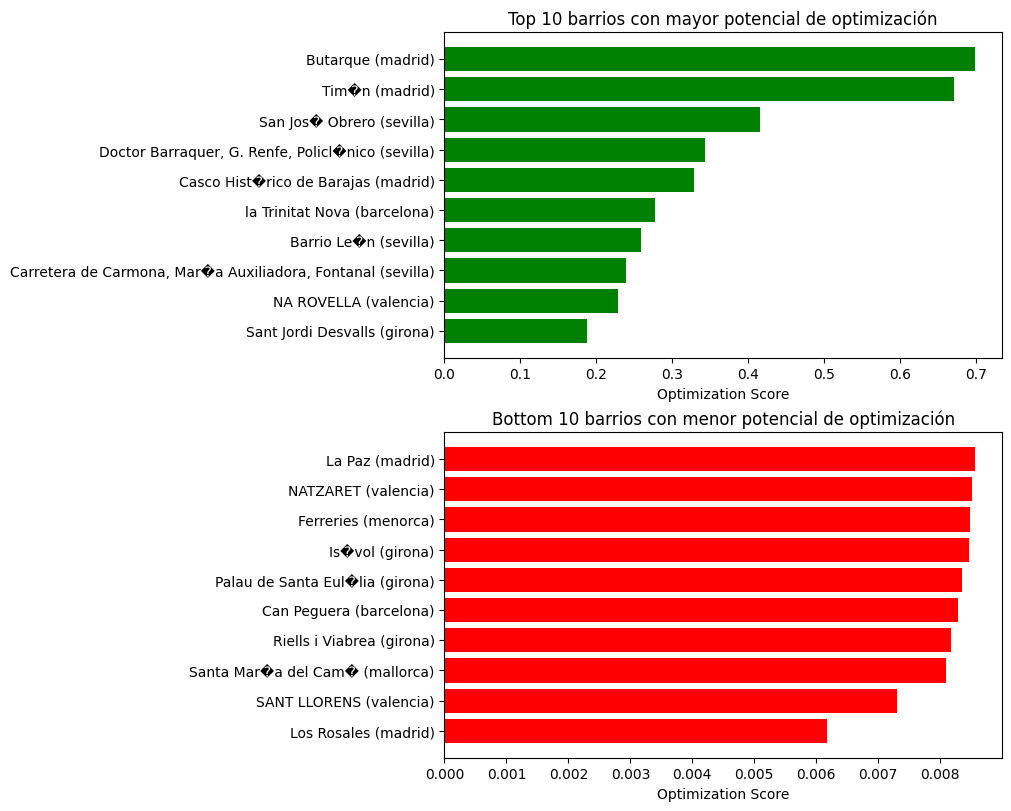

In [16]:
# Resetear el índice para acceder a las columnas como datos
agg_df_reset_2 = agg_df_2.reset_index()

# Top 10 y Bottom 10
top10 = agg_df_reset_2.head(10)
bottom10 = agg_df_reset_2.tail(10)

# Gráfico
fig, ax = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

# Top 10
ax[0].barh(top10['neighbourhood_name'] + " (" + top10['city'] + ")", top10['optimization_score_scaled'], color='green')
ax[0].set_title('Top 10 barrios con mayor potencial de optimización')
ax[0].invert_yaxis()
ax[0].set_xlabel('Optimization Score')

# Bottom 10
ax[1].barh(bottom10['neighbourhood_name'] + " (" + bottom10['city'] + ")", bottom10['optimization_score_scaled'], color='red')
ax[1].set_title('Bottom 10 barrios con menor potencial de optimización')
ax[1].invert_yaxis()
ax[1].set_xlabel('Optimization Score')

plt.show()

## Test de hipótesis
    Objetivo:
        Hipótesis nula (H₀): No hay diferencia significativa en la media del optimization_score entre dos grupos de barrios.
        Hipótesis alternativa (H₁): Sí hay una diferencia significativa.

### Comparar top barrios vs bottom barrios

In [17]:
# Convertir agg_df a formato con índice explícito
agg_df_reset = agg_df.reset_index()

# Top y bottom 10
top10 = agg_df_reset.head(10)['optimization_score']
bottom10 = agg_df_reset.tail(10)['optimization_score']

# Test de hipótesis (Welch t-test, que no asume varianzas iguales)
stat, p_value = ttest_ind(top10, bottom10, equal_var=False)

print(f"Estadístico t: {stat:.3f}")
print(f"P-valor: {p_value:.5f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("✅ Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("❌ No se puede rechazar la hipótesis nula: no hay diferencia significativa.")


Estadístico t: 6.487
P-valor: 0.00011
✅ Rechazamos la hipótesis nula: hay diferencia significativa.


In [18]:
# Convertir agg_df a formato con índice explícito
agg_df_reset_2 = agg_df_2.reset_index()

# Top y bottom 10
top10 = agg_df_reset_2.head(10)['optimization_score_scaled']
bottom10 = agg_df_reset_2.tail(10)['optimization_score_scaled']

# Test de hipótesis (Welch t-test, que no asume varianzas iguales)
stat, p_value = ttest_ind(top10, bottom10, equal_var=False)

print(f"Estadístico t: {stat:.3f}")
print(f"P-valor: {p_value:.5f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("✅ Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("❌ No se puede rechazar la hipótesis nula: no hay diferencia significativa.")


Estadístico t: 6.236
P-valor: 0.00015
✅ Rechazamos la hipótesis nula: hay diferencia significativa.


# OPCION 2: FORMA ALTERNATIVA DE DAR RESPUESTA A LA PREGUNTA DE NEGOCIO

## Cálculo de métricas agregadas por ciudad y barrio

In [19]:
df_grouped = df.groupby(['city', 'neighbourhood_name']).agg({
    'number_of_reviews': 'mean',
    'review_scores_rating': 'mean',
    'review_scores_location': 'mean',
    'minimum_nights': 'mean',
    'maximum_nights': 'mean',
    'availability_365': 'mean',
    'occupancy_rate': 'mean',
    'apartment_id': 'count'  # para saber cuántos alojamientos hay en cada barrio
}).reset_index().rename(columns={'apartment_id': 'num_apartments'})

## Definir el índice de potencial de optimización

In [20]:
df_grouped['optimizacion_potencial'] = (
    df_grouped['review_scores_location'] * 0.4 +
    df_grouped['review_scores_rating'] * 0.3 +
    df_grouped['occupancy_rate'] * 0.2 -
    df_grouped['minimum_nights'] * 0.05 -
    df_grouped['maximum_nights'] * 0.05
)


## Visualización

C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\3566016126.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_barrios, y='zona', x='optimizacion_potencial', palette='viridis')


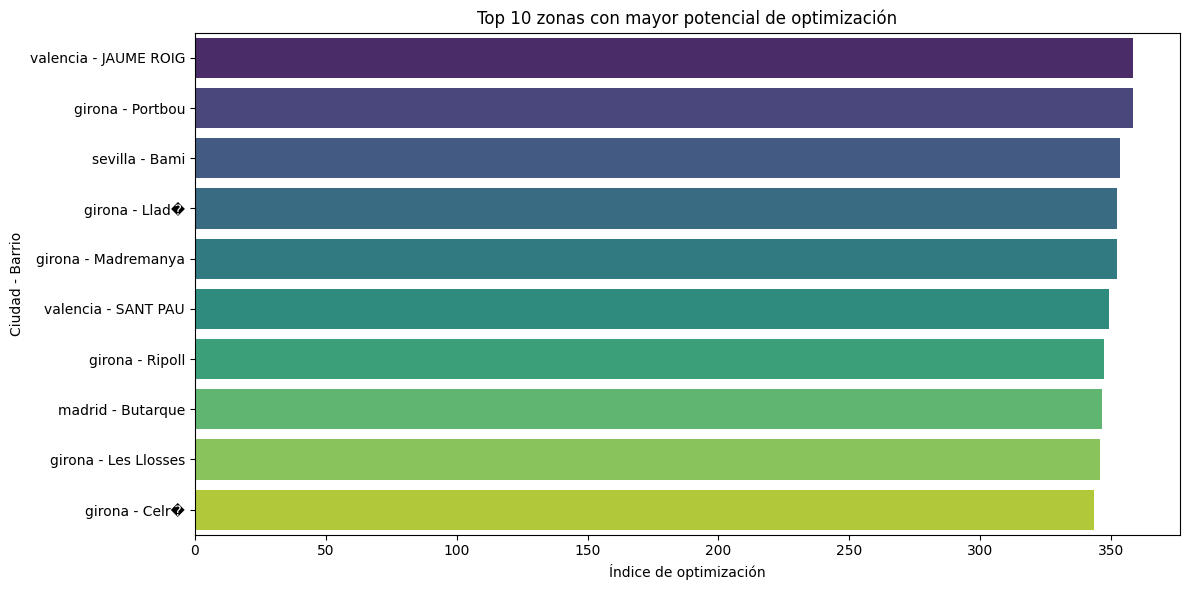

In [21]:
# Ordenamos por mayor potencial de optimización
top_barrios = df_grouped.sort_values('optimizacion_potencial', ascending=False).head(10)

# Creamos una nueva columna para mostrar ciudad y barrio juntos
top_barrios['zona'] = top_barrios['city'] + ' - ' + top_barrios['neighbourhood_name']

# Visualización con Seaborn (más estética)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_barrios, y='zona', x='optimizacion_potencial', palette='viridis')
plt.title('Top 10 zonas con mayor potencial de optimización')
plt.xlabel('Índice de optimización')
plt.ylabel('Ciudad - Barrio')
plt.tight_layout()
plt.show()


## Boxplot por ciudad

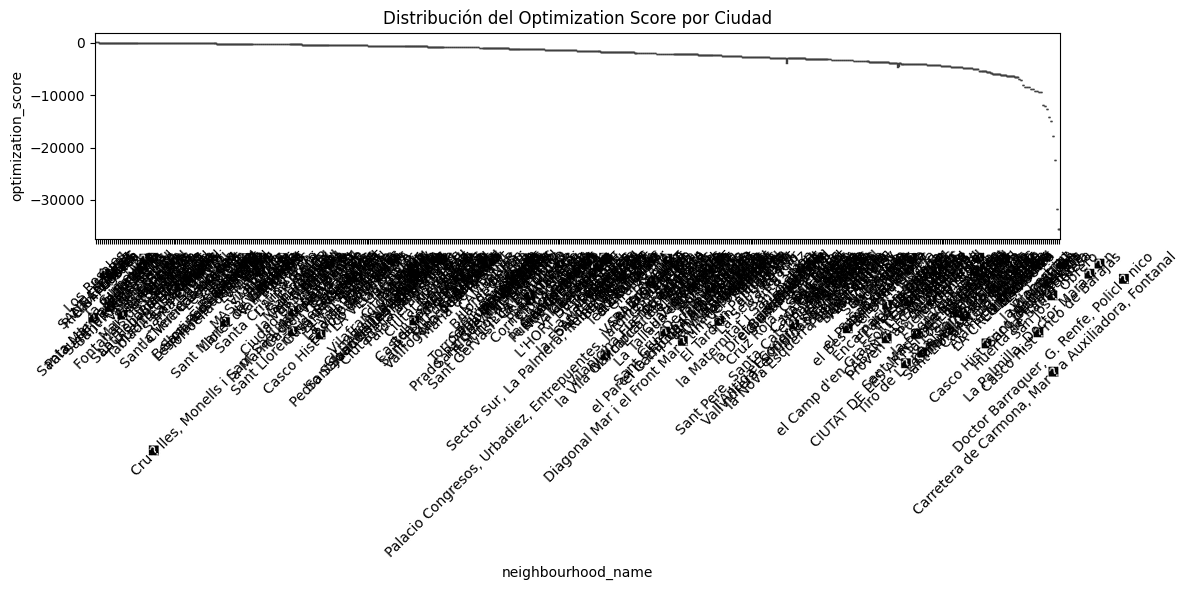

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=agg_df, x='neighbourhood_name', y='optimization_score')
plt.title('Distribución del Optimization Score por Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Violin plot

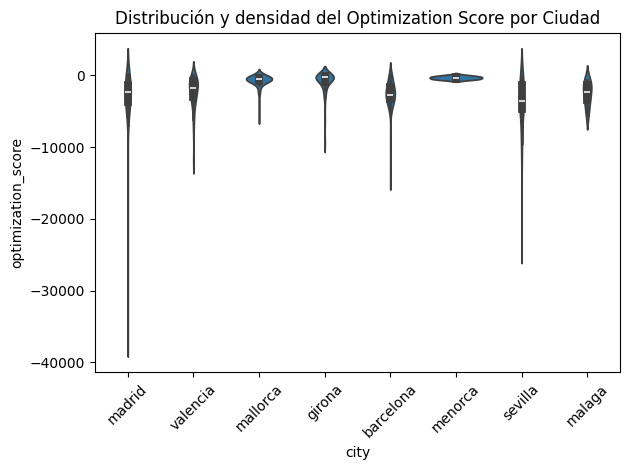

In [23]:
sns.violinplot(data=agg_df, x='city', y='optimization_score')
plt.title('Distribución y densidad del Optimization Score por Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Lollipop chart

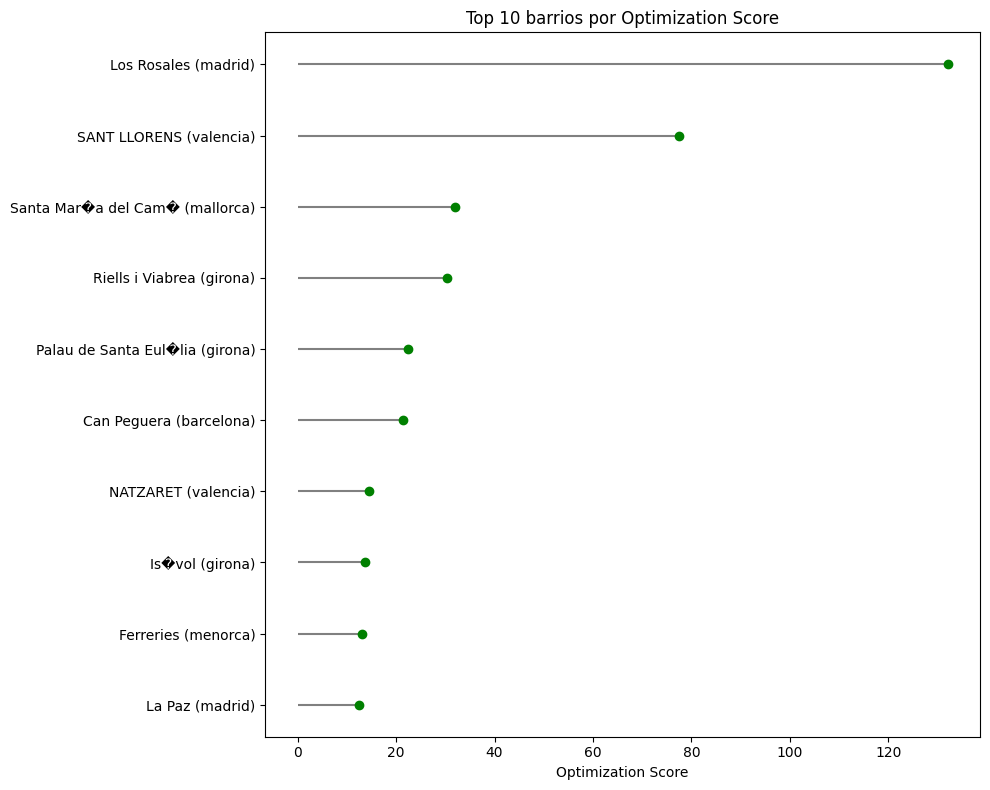

In [24]:
# Asegúrate de resetear el índice si tienes un MultiIndex
agg_df = agg_df.reset_index()

# Ordenar y seleccionar los 10 mejores
sorted_df = agg_df.sort_values('optimization_score', ascending=False).head(10)

# Crear la etiqueta compuesta
sorted_df['label'] = sorted_df['neighbourhood_name'] + " (" + sorted_df['city'] + ")"

# Plot tipo lollipop
plt.figure(figsize=(10, 8))
plt.hlines(y=sorted_df['label'], xmin=0, xmax=sorted_df['optimization_score'], color='gray')
plt.plot(sorted_df['optimization_score'], sorted_df['label'], "o", color='green')
plt.title('Top 10 barrios por Optimization Score')
plt.xlabel('Optimization Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [50]:


# Tablas de frecuencia para las categorías seleccionadas
categorical_columns = ['city', 'neighbourhood_name', 'review_scores_location', 
                       'review_scores_rating', 'minimum_nights', 'maximum_nights']

# Generar y mostrar tablas de frecuencia para cada categoría
for col in categorical_columns:
    frequency_table = df[col].value_counts().reset_index()
    frequency_table.columns = [col, 'count']
    
    # Mostrar la tabla de frecuencia
    print(f"\nFrecuencia de {col}:")
    print(frequency_table.head(10))  # Muestra las 10 categorías más frecuentes




Frecuencia de city:
        city  count
0  barcelona   2719
1     madrid   2134
2   mallorca   1583
3     girona   1485
4   valencia    513
5     malaga    504
6    sevilla    494
7    menorca    218

Frecuencia de neighbourhood_name:
                      neighbourhood_name  count
0                                 Centro    324
1                 la Dreta de l'Eixample    297
2                            Embajadores    278
3                      Palma de Mallorca    209
4                               el Raval    205
5                            Universidad    203
6                               Pollen�a    192
7  Sant Pere, Santa Caterina i la Ribera    178
8                                Alc�dia    173
9                         el Barri G�tic    171

Frecuencia de review_scores_location:
   review_scores_location  count
0                   100.0   4619
1                    90.0   1915
2                    80.0    453
3                    70.0     58
4                    60.0     39

In [26]:
mask = df['neighbourhood_name'].str.contains('�', na=False) | df['neighbourhood_district'].str.contains('�', na=False)
df_with_replacement_char = df[mask][['city', 'neighbourhood_name', 'neighbourhood_district']]

print(df_with_replacement_char)

           city                  neighbourhood_name neighbourhood_district
0        girona                              Llan��                    NaN
3       menorca                               Mah�n                    NaN
6        girona                              Llan��                    NaN
8        girona                 Castell� d'Emp�ries                    NaN
17       girona                 Castell� d'Emp�ries                    NaN
...         ...                                 ...                    ...
9643  barcelona  el Camp d'en Grassot i Gr�cia Nova                 Gr�cia
9644  barcelona                   la Vila de Gr�cia                 Gr�cia
9645  barcelona                      el Barri G�tic           Ciutat Vella
9647  barcelona       la Vila Ol�mpica del Poblenou             Sant Mart�
9648  barcelona   el Parc i la Llacuna del Poblenou             Sant Mart�

[3006 rows x 3 columns]


In [27]:
mask_district = df['neighbourhood_district'].str.contains('�', na=False)
district_issues = df[mask_district][['city', 'neighbourhood_district']].drop_duplicates()
print(district_issues)

           city neighbourhood_district
53      sevilla                Nervi�n
146   barcelona         Sants-Montju�c
154   barcelona             Sant Mart�
157      madrid               Chamber�
164   barcelona                 Gr�cia
178      madrid              Chamart�n
195      madrid                 Tetu�n
477   barcelona         Horta-Guinard�
498   barcelona    Sarri�-Sant Gervasi
1596     madrid              Vic�lvaro


# TÉCNICA ABELARDO

##  Extraer todos los nombres de barrios

In [28]:
all_neighbourhoods = df['neighbourhood_name'].tolist()

## Ordenar y mostrar los valores únicos.

In [29]:
unique_neighbourhood = sorted(set(all_neighbourhoods))

## Normalizar (convertira minúsculas).

In [30]:
normalized_neighbourhoods = [name.lower() for name in df['neighbourhood_name']]

## Contar repeticiones.

In [31]:
from collections import Counter

neighbourhood_counts = Counter(normalized_neighbourhoods)

## Mostrar los nombre únicos normalizados y ordenados.

In [32]:
unique_normalized_neighbourhood = sorted(set(normalized_neighbourhoods))

## Dataframe con los nombres únicos y normalizados.

In [33]:
df_neighbourhoods = df[['neighbourhood_name']].copy()
df_neighbourhoods['normalized_name'] = df_neighbourhoods['neighbourhood_name'].str.lower()

## Ver las combinaciones únicas (original vs. normalizado)

In [34]:
neighbourhood_mapping = df_neighbourhoods.drop_duplicates().sort_values('normalized_name')

print(neighbourhood_mapping)

     neighbourhood_name normalized_name
2525           Abrantes        abrantes
181             Acacias         acacias
262             Adelfas         adelfas
8207         Aeropuerto      aeropuerto
496             Aguilas         aguilas
...                 ...             ...
2701             Vila�r          vila�r
797            Villegas        villegas
469           Vinateros       vinateros
1205       Vista Alegre    vista alegre
1196              Zof�o           zof�o

[521 rows x 2 columns]


## Código para agrupar

### # Paso 1: Extraer y normalizar nombres de barrios

In [36]:
all_neighbourhoods = df['neighbourhood_name'].dropna().tolist()
normalized_neighbourhoods = [name.lower() for name in all_neighbourhoods]
unique_normalized_neighbourhoods = sorted(set(normalized_neighbourhoods))


### # Paso 2: Vectorizar usando TF-IDF (caracteres, para similitud "fuzzy")

In [37]:
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))
X = vectorizer.fit_transform(unique_normalized_neighbourhoods)

### # Paso 3: Calcular similitud y clustering

In [38]:
similarity = cosine_similarity(X)
distance_matrix = np.clip(1 - similarity, 0, 1)

clustering = DBSCAN(eps=0.3, min_samples=1, metric='precomputed')
labels = clustering.fit_predict(distance_matrix)


### # Paso 4: Crear diccionario de grupos de barrios

In [39]:
clustered_neighbourhoods = defaultdict(list)
for label, name in zip(labels, unique_normalized_neighbourhoods):
    clustered_neighbourhoods[label].append(name)


### # Paso 5: Mostrar resultados

In [40]:
print(f"\nSe identificaron {len(clustered_neighbourhoods)} grupos de barrios similares.")

for cluster_id, group in sorted(clustered_neighbourhoods.items()):
    print(f"\nGrupo {cluster_id + 1}:")
    print(", ".join(sorted(group)))



Se identificaron 502 grupos de barrios similares.

Grupo 1:
abrantes

Grupo 2:
acacias

Grupo 3:
adelfas

Grupo 4:
aeropuerto

Grupo 5:
aguilas

Grupo 6:
aiguaviva

Grupo 7:
aiora

Grupo 8:
alaior

Grupo 9:
alameda de osuna

Grupo 10:
alar�

Grupo 11:
albons

Grupo 12:
albors

Grupo 13:
alc�dia

Grupo 14:
alfalfa

Grupo 15:
algaida

Grupo 16:
almagro

Grupo 17:
almenara

Grupo 18:
almendrales

Grupo 19:
alp

Grupo 20:
aluche

Grupo 21:
amer

Grupo 22:
an roque

Grupo 23:
andratx

Grupo 24:
arapiles

Grupo 25:
arb�cies

Grupo 26:
arcos

Grupo 27:
arenal

Grupo 28:
arg�elles

Grupo 29:
ariany

Grupo 30:
arrancapins

Grupo 31:
art�

Grupo 32:
atocha

Grupo 33:
bailen-miraflores

Grupo 34:
bami

Grupo 35:
banyalbufar

Grupo 36:
banyoles

Grupo 37:
barrio le�n

Grupo 38:
bda. de pineda

Grupo 39:
bda. pino montano

Grupo 40:
begur

Grupo 41:
bellas vistas

Grupo 42:
bellcaire d'empord�

Grupo 43:
benicalap

Grupo 44:
benimaclet

Grupo 45:
benimamet

Grupo 46:
berruguete

Grupo 47:
besal�



### # Paso 6 (opcional): crear un diccionario para mapear cada barrio a su nombre canÃ³nico

In [41]:
# Usamos el primer nombre del grupo como representante
neighbourhood_mapping_dict = {}
for group in clustered_neighbourhoods.values():
    canonical_name = sorted(group)[0]
    for name in group:
        neighbourhood_mapping_dict[name] = canonical_name


In [42]:
# Aplicar el mapeo al DataFrame original
df['neighbourhood_canonical'] = df['neighbourhood_name'].str.lower().map(neighbourhood_mapping_dict)


In [ ]:
# Mostrar mapeo final
print("\nEjemplo de mapeo de nombres originales a normalizados:")
print(df[['neighbourhood_name', 'neighbourhood_canonical','']].drop_duplicates().head(50))


Ejemplo de mapeo de nombres originales a normalizados:
                      neighbourhood_name               neighbourhood_canonical
0                                 Llan��                                llan��
1                  Fontanals de Cerdanya                 fontanals de cerdanya
2                          Lloret de Mar                         lloret de mar
3                                  Mah�n                                 mah�n
5                        Es Migjorn Gran                       es migjorn gran
7                                 Centro                                centro
8                    Castell� d'Emp�ries                   castell� d'emp�ries
9                   Castell-Platja d'Aro                  castell-platja d'aro
10                                Blanes                                blanes
12                            Santa Cruz                            santa cruz
13                           Palafrugell                           palafrug

# TERCERA OPCIÓN SPRINT 3

Arxiu carregat correctament: ../Data/2025_04_28_Sprint03.csv
dict_keys(['df2025_04_28_Sprint03'])


<Figure size 1000x600 with 0 Axes>

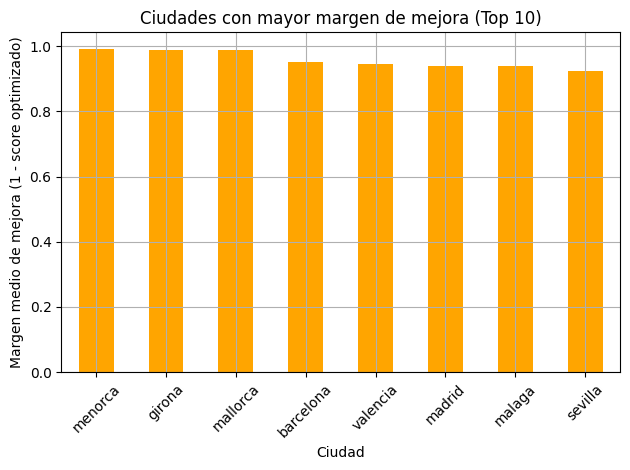

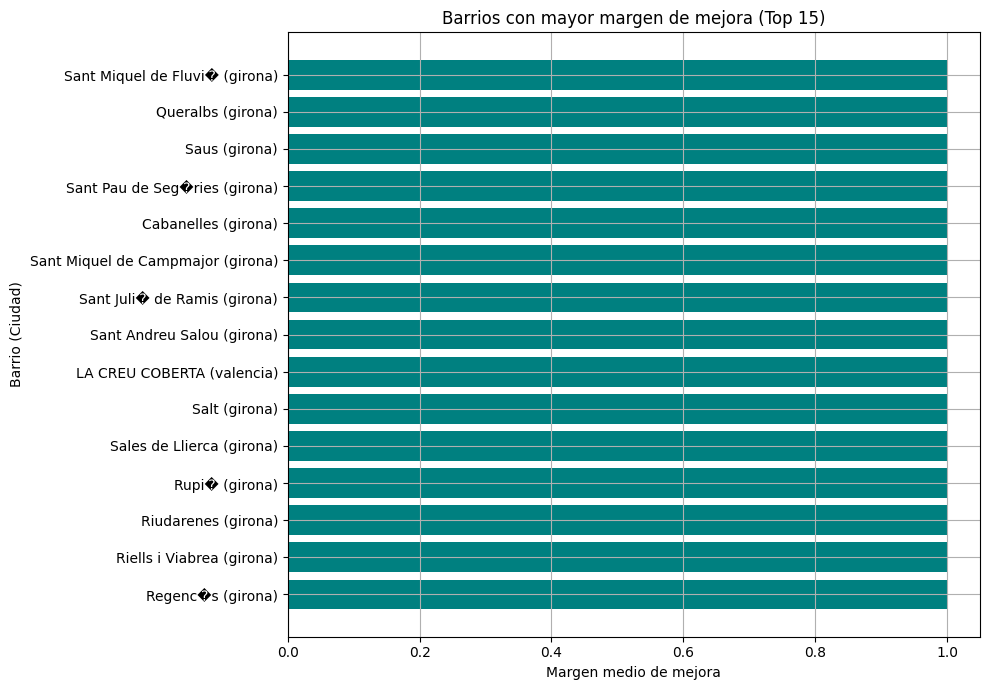

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# === 1. Cargar CSV ===
# Ruta relativa al fitxer dins del repositori Git
csv_path = "../Data/2025_04_28_Sprint03.csv"

try:
    # Carregar el CSV com a DataFrame
    df = pd.read_csv(csv_path)
    print(f"Arxiu carregat correctament: {csv_path}")
    
    # Diccionari per simular múltiples DataFrames si cal
    DataFrames = {"df2025_04_28_Sprint03": df}
    print(DataFrames.keys())
    
    # Opcional: exposar el DataFrame com a variable local
    locals().update(DataFrames)

except FileNotFoundError:
    print(f"No s'ha trobat l'arxiu: {csv_path}")
except Exception as e:
    print(f"S'ha produït un error en llegir el CSV: {e}")
# === 2. Limpiar y rellenar valores nulos relevantes ===
df['occupancy_rate'] = df['occupancy_rate'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['minimum_nights'] = df['minimum_nights'].fillna(1)

# === 3. Calcular optimization_score ===
df['optimization_score'] = (df['occupancy_rate'] * df['reviews_per_month']) / (df['minimum_nights'] + 1)

# === 4. Normalizar optimization_score entre 0 y 1 ===
scaler = MinMaxScaler()
df['optimization_score_scaled'] = scaler.fit_transform(df[['optimization_score']])

# === 5. Calcular margen de mejora ===
df['margin_for_improvement'] = 1 - df['optimization_score_scaled']

# === 6. Agrupar por ciudad ===
city_agg = df.groupby('city')[['margin_for_improvement']].mean().sort_values(by='margin_for_improvement', ascending=False)

# === 7. Agrupar por barrio ===
neigh_agg = df.groupby(['city', 'neighbourhood_name'])[['margin_for_improvement']].mean().sort_values(by='margin_for_improvement', ascending=False)

# === 8. Gráfico 1: Ciudades con mayor margen de mejora ===
plt.figure(figsize=(10,6))
city_agg.head(10).plot(kind='bar', legend=False, color='orange')
plt.title('Ciudades con mayor margen de mejora (Top 10)')
plt.ylabel('Margen medio de mejora (1 - score optimizado)')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.savefig("slide_1_ciudades_margen_mejora.png")
plt.show()

# === 9. Gráfico 2: Barrios con mayor margen de mejora ===
top_neigh = neigh_agg.head(15).reset_index()
plt.figure(figsize=(10,7))
plt.barh(top_neigh['neighbourhood_name'] + " (" + top_neigh['city'] + ")", top_neigh['margin_for_improvement'], color='teal')
plt.title('Barrios con mayor margen de mejora (Top 15)')
plt.xlabel('Margen medio de mejora')
plt.ylabel('Barrio (Ciudad)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(True)
plt.savefig("slide_2_barrios_margen_mejora.png")
plt.show()


#  ANOVA (evalúa si al menos una ciudad tiene un margen de mejora medio significativamente distinto respecto a las demás)
    Hipótesis:
        H₀ (nula): Todas las ciudades tienen el mismo margen medio de mejora.
        H₁ (alternativa): Al menos una ciudad tiene un margen de mejora diferente.

In [65]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filtrar ciudades con suficientes datos
city_counts = df['city'].value_counts()
valid_cities = city_counts[city_counts > 30].index
df_filtered = df[df['city'].isin(valid_cities)].copy()

# Asegurarse de que no haya NaNs
df_filtered = df_filtered[['city', 'margin_for_improvement']].dropna()

# Crear grupos
city_groups = [df_filtered[df_filtered['city'] == city]['margin_for_improvement'] for city in valid_cities]

# ANOVA
f_stat, p_value = f_oneway(*city_groups)

# Resultados ANOVA
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("✅ Hay diferencias estadísticamente significativas en el margen de mejora entre al menos dos ciudades.")

    # Test de Tukey HSD
    tukey = pairwise_tukeyhsd(endog=df_filtered['margin_for_improvement'],
                              groups=df_filtered['city'],
                              alpha=0.05)

    print("\n📊 Resultados del test de Tukey (pares de ciudades con diferencia significativa):")
    print(tukey.summary())

    # Filtrar solo las comparaciones significativas
    tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
    significant_pairs = tukey_df[tukey_df['reject'] == True]

    if not significant_pairs.empty:
        print("\n🔎 Pares con diferencia significativa:")
        for _, row in significant_pairs.iterrows():
            print(f"➡️ {row['group1']} vs {row['group2']} (p-adj: {row['p-adj']:.4f})")
    else:
        print("No se encontraron pares de ciudades con diferencia significativa individual.")
else:
    print("🔍 No hay diferencias estadísticamente significativas en el margen de mejora entre las ciudades analizadas.")


F-statistic: 84.9613
P-value: 0.000000
✅ Hay diferencias estadísticamente significativas en el margen de mejora entre al menos dos ciudades.

📊 Resultados del test de Tukey (pares de ciudades con diferencia significativa):
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
barcelona   girona   0.0378    0.0   0.029  0.0465   True
barcelona   madrid  -0.0111 0.0005  -0.019 -0.0033   True
barcelona   malaga  -0.0124 0.0836 -0.0255  0.0008  False
barcelona mallorca   0.0367    0.0  0.0281  0.0453   True
barcelona  menorca   0.0427    0.0  0.0236  0.0618   True
barcelona  sevilla  -0.0278    0.0 -0.0411 -0.0145   True
barcelona valencia  -0.0042 0.9773 -0.0173  0.0088  False
   girona   madrid  -0.0489    0.0 -0.0581 -0.0398   True
   girona   malaga  -0.0502    0.0 -0.0641 -0.0362   True
   girona mallorca  -0.0011    1.0 -0.0109  0.0087  False
   girona  menorca   0.

## ANOVA: Por barrios

In [94]:
# Filtrar barrios con suficientes datos
neighbourhood_counts = df['neighbourhood_name'].value_counts()
valid_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 30].index
df_filtered = df[df['neighbourhood_name'].isin(valid_neighbourhoods)].copy()

# Asegurarse de que no haya NaNs
df_filtered = df_filtered[['neighbourhood_name', 'margin_for_improvement']].dropna()

# Crear grupos para cada barrio
neighbourhood_groups = [df_filtered[df_filtered['neighbourhood_name'] == neighbourhood]['margin_for_improvement'] 
                        for neighbourhood in valid_neighbourhoods]

# ANOVA
f_stat, p_value = f_oneway(*neighbourhood_groups)

# Resultados ANOVA
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("✅ Hay diferencias estadísticamente significativas en el margen de mejora entre al menos dos barrios.")

    # Test de Tukey HSD
    tukey = pairwise_tukeyhsd(endog=df_filtered['margin_for_improvement'],
                              groups=df_filtered['neighbourhood_name'],
                              alpha=0.05)

    print("\n📊 Resultados del test de Tukey (pares de barrios con diferencia significativa):")
    print(tukey.summary())

    # Filtrar solo las comparaciones significativas
    tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
    significant_pairs = tukey_df[tukey_df['reject'] == True]

    if not significant_pairs.empty:
        print("\n🔎 Pares con diferencia significativa:")
        for _, row in significant_pairs.iterrows():
            print(f"➡️ {row['group1']} vs {row['group2']} (p-adj: {row['p-adj']:.4f})")
    else:
        print("No se encontraron pares de barrios con diferencia significativa individual.")
else:
    print("🔍 No hay diferencias estadísticamente significativas en el margen de mejora entre los barrios analizados.")

F-statistic: 8.3722
P-value: 0.000000
✅ Hay diferencias estadísticamente significativas en el margen de mejora entre al menos dos barrios.


c:\Users\Albert\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,



📊 Resultados del test de Tukey (pares de barrios con diferencia significativa):
                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
                group1                                group2                meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------------
                               Alaior                               Alc�dia      0.0    1.0 -0.0708  0.0708  False
                               Alaior                               Alfalfa  -0.0676 0.4589 -0.1502   0.015  False
                               Alaior                                Arenal   -0.081 0.2223 -0.1718  0.0099  False
                               Alaior                             Arg�elles  -0.0237    1.0 -0.1117  0.0644  False
                               Alaior                                  Art�   0.0049    1.0 -0.0873  0.0972  False

## agrupado por ciudades

In [95]:

# Filtrar barrios con suficientes datos
neighbourhood_counts = df['neighbourhood_name'].value_counts()
valid_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 30].index
df_filtered = df[df['neighbourhood_name'].isin(valid_neighbourhoods)].copy()

# Asegurarse de que no haya NaNs
df_filtered = df_filtered[['city', 'neighbourhood_name', 'margin_for_improvement']].dropna()

# Crear un diccionario para almacenar los resultados por ciudad
city_results = {}

# Obtener ciudades únicas
cities = df_filtered['city'].unique()

# Iterar sobre cada ciudad
for city in cities:
    # Filtrar los datos de la ciudad actual
    city_data = df_filtered[df_filtered['city'] == city]

    # Crear grupos por barrio en esta ciudad
    neighbourhood_groups = [city_data[city_data['neighbourhood_name'] == neighbourhood]['margin_for_improvement'] 
                            for neighbourhood in city_data['neighbourhood_name'].unique()]

    # Realizar ANOVA
    f_stat, p_value = f_oneway(*neighbourhood_groups)

    # Guardar los resultados de ANOVA en el diccionario de resultados por ciudad
    city_results[city] = {
        'f_statistic': f_stat,
        'p_value': p_value
    }

    # Ver si hay diferencias significativas
    if p_value < 0.05:
        # Si es significativo, realizar el test de Tukey HSD
        tukey = pairwise_tukeyhsd(endog=city_data['margin_for_improvement'],
                                  groups=city_data['neighbourhood_name'],
                                  alpha=0.05)

        # Filtrar solo las comparaciones significativas
        tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        significant_pairs = tukey_df[tukey_df['reject'] == True]

        # Guardar los resultados de Tukey en el diccionario de resultados por ciudad
        city_results[city]['tukey_results'] = significant_pairs

    else:
        city_results[city]['tukey_results'] = "No hay diferencias significativas"

# Mostrar los resultados
for city, results in city_results.items():
    print(f"\nResultados para la ciudad: {city}")
    print(f"F-statistic: {results['f_statistic']:.4f}")
    print(f"P-value: {results['p_value']:.6f}")
    if isinstance(results['tukey_results'], pd.DataFrame):
        print("\n📊 Resultados del test de Tukey (pares de barrios con diferencia significativa):")
        print(results['tukey_results'])
    else:
        print(results['tukey_results'])



Resultados para la ciudad: girona
F-statistic: 6.6027
P-value: 0.000000

📊 Resultados del test de Tukey (pares de barrios con diferencia significativa):
                  group1                 group2  meandiff   p-adj   lower  \
5                  Begur                 Girona   -0.0454  0.0000 -0.0670   
20                Blanes                 Girona   -0.0368  0.0000 -0.0616   
31              Cadaqu�s                Calonge    0.0258  0.0265  0.0014   
32              Cadaqu�s   Castell-Platja d'Aro    0.0283  0.0035  0.0049   
35              Cadaqu�s               L'Escala    0.0259  0.0131  0.0026   
39              Cadaqu�s                Palam�s    0.0292  0.0441  0.0003   
40              Cadaqu�s                   Pals    0.0273  0.0279  0.0013   
41              Cadaqu�s                  Roses    0.0227  0.0404  0.0004   
47               Calonge                 Girona   -0.0472  0.0000 -0.0690   
59  Castell-Platja d'Aro                 Girona   -0.0497  0.0000 -0.0703   

## Gráfico orden de mejora por ciudad

C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\1527801577.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='mean', y='city', data=city_margin_stats, ci="sd", palette='viridis')
C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\1527801577.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='city', data=city_margin_stats, ci="sd", palette='viridis')


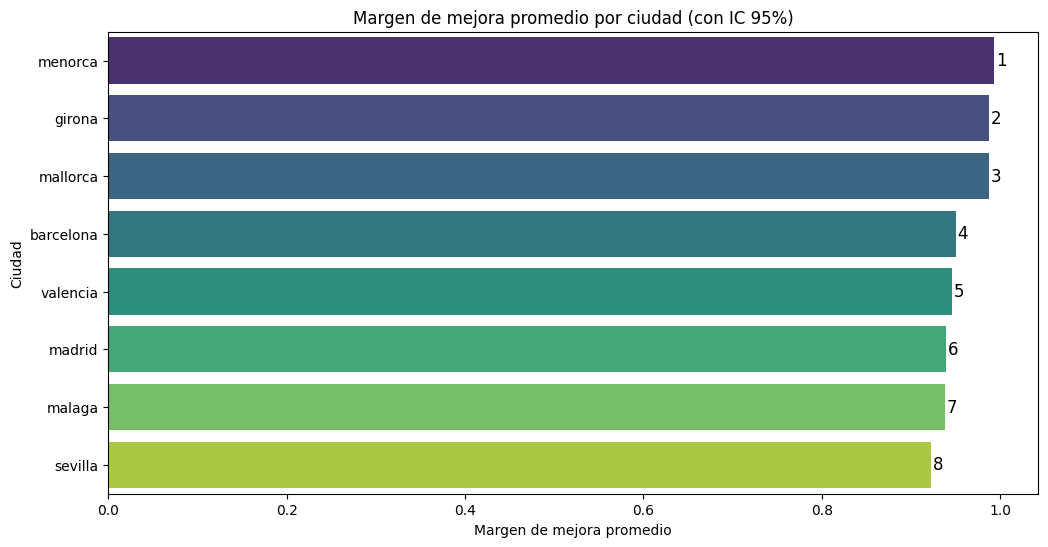

In [74]:
# Calcular estadísticas (media y error estándar)
city_margin_stats = df.groupby('city')['margin_for_improvement'].agg(['mean', 'sem'])

# Ordenar las ciudades por el margen de mejora promedio de mayor a menor
city_margin_stats = city_margin_stats.sort_values('mean', ascending=False)

# Asignar un ranking a las ciudades
city_margin_stats['rank'] = city_margin_stats['mean'].rank(ascending=False, method='min')

# Graficar
plt.figure(figsize=(12, 6))

# Graficamos el gráfico de barras
sns.barplot(x='mean', y='city', data=city_margin_stats, ci="sd", palette='viridis')

# Añadir el número de rango encima de cada barra
for i, (city, row) in enumerate(city_margin_stats.iterrows()):
    plt.text(row['mean'] + 0.002, i, f'{int(row["rank"])}', va='center', ha='left', fontsize=12, color='black')

# Título y etiquetas
plt.title('Margen de mejora promedio por ciudad (con IC 95%)')
plt.xlabel('Margen de mejora promedio')
plt.ylabel('Ciudad')

# Mostrar el gráfico
plt.show()

## Gráfico orden de mejora por barrio

C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\374986345.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_neighbourhoods['rank'] = top_15_neighbourhoods['mean'].rank(ascending=False, method='min')
C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\374986345.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='mean', y='neighbourhood_name', data=top_15_neighbourhoods, ci="sd", palette='viridis')
C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\374986345.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='neig

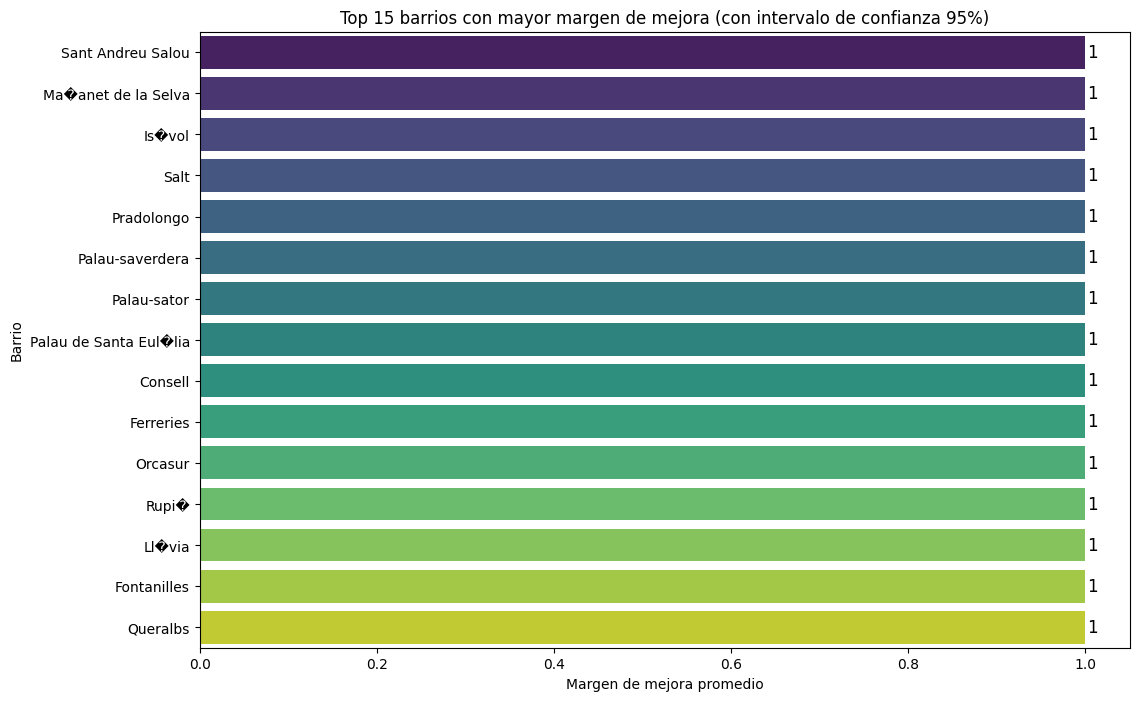

In [77]:
# Calcular estadísticas (media y error estándar) para los barrios
neighbourhood_margin_stats = df.groupby('neighbourhood_name')['margin_for_improvement'].agg(['mean', 'sem'])

# Ordenar los barrios por el margen de mejora promedio de mayor a menor
neighbourhood_margin_stats = neighbourhood_margin_stats.sort_values('mean', ascending=False)

# Seleccionar solo los 15 barrios con el mejor margen de mejora
top_15_neighbourhoods = neighbourhood_margin_stats.head(15)

# Asignar un ranking a los barrios
top_15_neighbourhoods['rank'] = top_15_neighbourhoods['mean'].rank(ascending=False, method='min')

# Graficar
plt.figure(figsize=(12, 8))

# Graficamos el gráfico de barras para los 15 mejores barrios
sns.barplot(x='mean', y='neighbourhood_name', data=top_15_neighbourhoods, ci="sd", palette='viridis')

# Añadir el número de rango encima de cada barra
for i, (neighbourhood, row) in enumerate(top_15_neighbourhoods.iterrows()):
    plt.text(row['mean'] + 0.002, i, f'{int(row["rank"])}', va='center', ha='left', fontsize=12, color='black')

# Título y etiquetas
plt.title('Top 15 barrios con mayor margen de mejora (con intervalo de confianza 95%)')
plt.xlabel('Margen de mejora promedio')
plt.ylabel('Barrio')

# Mostrar el gráfico
plt.show()

C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\2141725448.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_neighbourhoods['rank'] = top_15_neighbourhoods['mean'].rank(ascending=False, method='min')
C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\2141725448.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='mean', y='neighbourhood_with_city', data=top_15_neighbourhoods, ci="sd", palette='viridis')
C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\2141725448.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean',

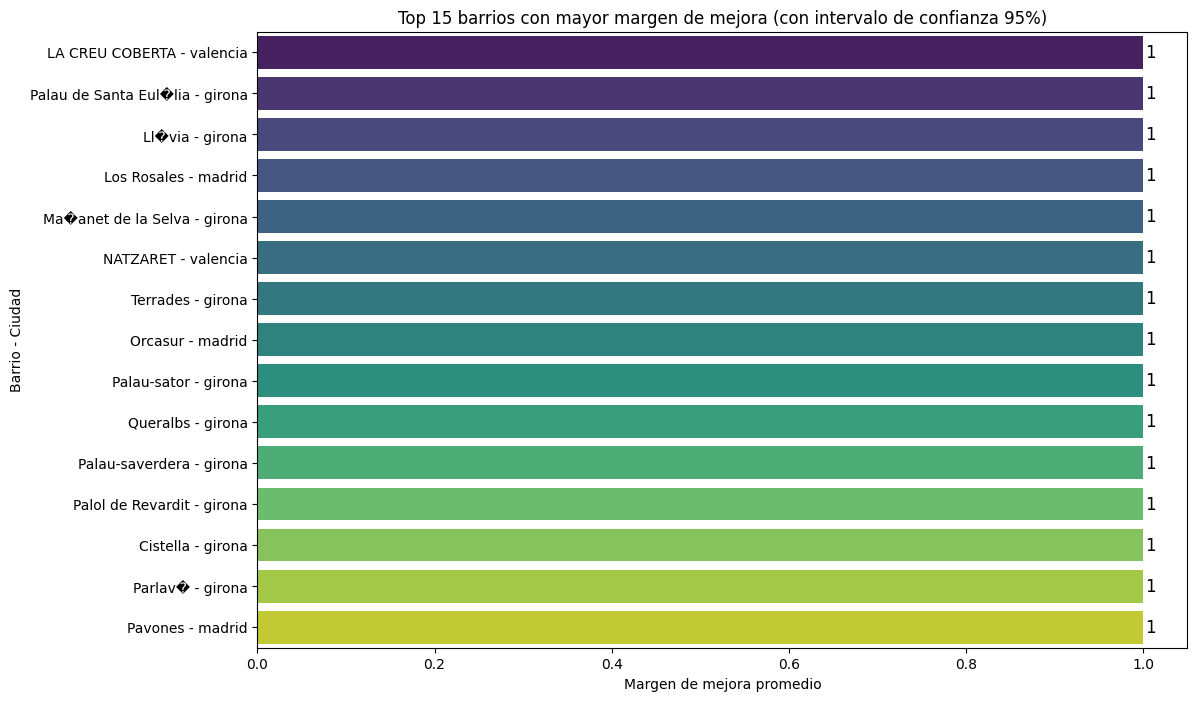

In [78]:
# Crear una nueva columna combinando barrio y ciudad
df['neighbourhood_with_city'] = df['neighbourhood_name'] + ' - ' + df['city']

# Calcular estadísticas (media y error estándar) para los barrios
neighbourhood_margin_stats = df.groupby('neighbourhood_with_city')['margin_for_improvement'].agg(['mean', 'sem'])

# Ordenar los barrios por el margen de mejora promedio de mayor a menor
neighbourhood_margin_stats = neighbourhood_margin_stats.sort_values('mean', ascending=False)

# Seleccionar solo los 15 barrios con el mejor margen de mejora
top_15_neighbourhoods = neighbourhood_margin_stats.head(15)

# Asignar un ranking a los barrios
top_15_neighbourhoods['rank'] = top_15_neighbourhoods['mean'].rank(ascending=False, method='min')

# Graficar
plt.figure(figsize=(12, 8))

# Graficamos el gráfico de barras para los 15 mejores barrios
sns.barplot(x='mean', y='neighbourhood_with_city', data=top_15_neighbourhoods, ci="sd", palette='viridis')

# Añadir el número de rango encima de cada barra
for i, (neighbourhood, row) in enumerate(top_15_neighbourhoods.iterrows()):
    plt.text(row['mean'] + 0.002, i, f'{int(row["rank"])}', va='center', ha='left', fontsize=12, color='black')

# Título y etiquetas
plt.title('Top 15 barrios con mayor margen de mejora (con intervalo de confianza 95%)')
plt.xlabel('Margen de mejora promedio')
plt.ylabel('Barrio - Ciudad')

# Mostrar el gráfico
plt.show()


## Código para barrios con mayor margen de mejora por ciudad:

C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\937039074.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='neighbourhood_with_city', data=top_neighbourhoods_per_city, palette='viridis')


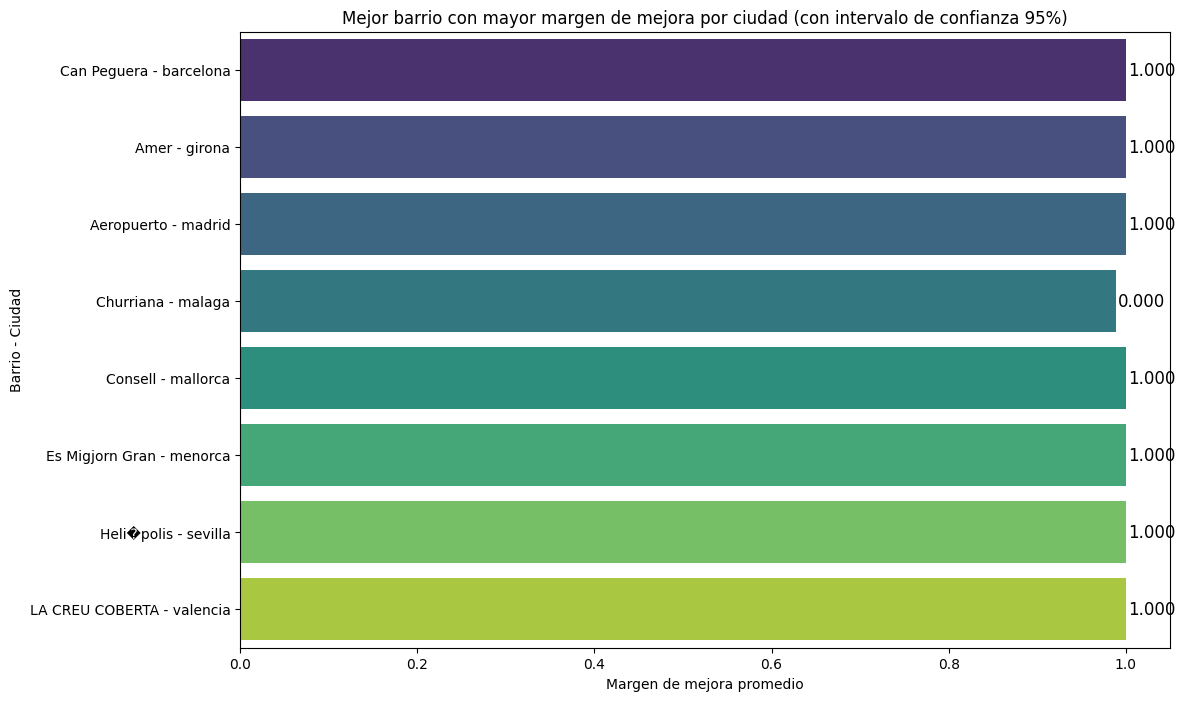

In [83]:
# Calcular estadísticas (media y error estándar) para los barrios en cada ciudad
city_neighbourhood_margin_stats = df.groupby(['city', 'neighbourhood_name'])['margin_for_improvement'].agg(['mean', 'sem'])

# Ordenar los barrios dentro de cada ciudad por el margen de mejora promedio de mayor a menor
city_neighbourhood_margin_stats = city_neighbourhood_margin_stats.sort_values(['city', 'mean'], ascending=[True, False])

# Seleccionar el barrio con el mayor margen de mejora de cada ciudad
top_neighbourhoods_per_city = city_neighbourhood_margin_stats.groupby('city').head(1)

# Reiniciar el índice para que las columnas 'city' y 'neighbourhood_name' sean accesibles
top_neighbourhoods_per_city = top_neighbourhoods_per_city.reset_index()

# Crear una nueva columna que combine el nombre del barrio y la ciudad, separados por un guión
top_neighbourhoods_per_city['neighbourhood_with_city'] = top_neighbourhoods_per_city['neighbourhood_name'] + ' - ' + top_neighbourhoods_per_city['city']

# Graficar
plt.figure(figsize=(12, 8))

# Graficamos el gráfico de barras para los barrios con mayor margen de mejora por ciudad
sns.barplot(x='mean', y='neighbourhood_with_city', data=top_neighbourhoods_per_city, palette='viridis')

# Añadir el número de rango encima de cada barra
for i, (neighbourhood, row) in enumerate(top_neighbourhoods_per_city.iterrows()):
    plt.text(row['mean'] + 0.002, i, f'{int(row["mean"]):.3f}', va='center', ha='left', fontsize=12, color='black')

# Título y etiquetas
plt.title('Mejor barrio con mayor margen de mejora por ciudad (con intervalo de confianza 95%)')
plt.xlabel('Margen de mejora promedio')
plt.ylabel('Barrio - Ciudad')

# Mostrar el gráfico
plt.show()




In [84]:
# Verificar los datos de margin_for_improvement para Málaga
malaga_data = df[df['city'] == 'Málaga'][['neighbourhood_name', 'margin_for_improvement']]

# Mostrar las primeras filas
print(malaga_data.head())

Empty DataFrame
Columns: [neighbourhood_name, margin_for_improvement]
Index: []


In [85]:
# Verificar todas las ciudades en el dataset
print(df['city'].unique())

# Verificar si hay registros con la ciudad "Málaga"
malaga_check = df[df['city'].str.contains('Málaga', case=False, na=False)]
print(malaga_check.head())

['girona' 'menorca' 'malaga' 'sevilla' 'valencia' 'mallorca' 'barcelona'
 'madrid']
Empty DataFrame
Columns: [apartment_id, name, description, host_id, neighbourhood_name, neighbourhood_district, room_type, accommodates, bathrooms, bedrooms, beds, amenities_list, price, minimum_nights, maximum_nights, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, first_review_date, last_review_date, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, is_instant_bookable, reviews_per_month, country, city, insert_date, amenities_normalized, days_occupied, occupancy_rate, supera_80, amenities_count, normalized_amenities, optimization_score, optimization_score_scaled, margin_for_improvement, neighbourhood_with_city]
Index: []

[0 rows x 45 columns]


In [86]:
# Verificar si la ciudad "Málaga" tiene datos en la columna 'margin_for_improvement'
malaga_check = df[df['city'].str.contains('malaga', case=False, na=False)]

# Ver los primeros registros de Málaga
print(malaga_check[['neighbourhood_name', 'margin_for_improvement']].head())


   neighbourhood_name  margin_for_improvement
7              Centro                1.000000
11             Centro                0.733773
27             Centro                1.000000
38             Centro                0.898942
40             Centro                0.931360


## Agrupar por ciudad y barrio, y calcular el margen de mejora promedio

In [89]:
# Agrupar por ciudad y barrio, y calcular la media del margen de mejora
city_neighbourhood_margin_stats = df.groupby(['city', 'neighbourhood_name'])['margin_for_improvement'].agg('mean').reset_index()

# Mostrar los primeros registros para verificar la correcta agrupación
print(city_neighbourhood_margin_stats.head(15))


         city                            neighbourhood_name  \
0   barcelona                                      Can Bar�   
1   barcelona                                   Can Peguera   
2   barcelona                              Ciutat Meridiana   
3   barcelona  Diagonal Mar i el Front Mar�tim del Poblenou   
4   barcelona                                         Horta   
5   barcelona                                   Hostafrancs   
6   barcelona                                       Montbau   
7   barcelona                                         Navas   
8   barcelona                                     Pedralbes   
9   barcelona                                         Porta   
10  barcelona                       Proven�als del Poblenou   
11  barcelona                                   Sant Andreu   
12  barcelona                                   Sant Antoni   
13  barcelona                      Sant Gen�s dels Agudells   
14  barcelona                        Sant Gervasi - Gal

## Filtrar los barrios con el mayor margen de mejora para cada ciudad

In [90]:
# Obtener el barrio con el mayor margen de mejora para cada ciudad
top_neighbourhoods_per_city = city_neighbourhood_margin_stats.loc[city_neighbourhood_margin_stats.groupby('city')['margin_for_improvement'].idxmax()]

# Mostrar los resultados para verificar
print(top_neighbourhoods_per_city)


          city neighbourhood_name  margin_for_improvement
1    barcelona        Can Peguera                1.000000
73      girona               Amer                1.000000
212     madrid         Aeropuerto                1.000000
328     malaga          Churriana                0.989049
349   mallorca            Consell                1.000000
391    menorca    Es Migjorn Gran                1.000000
414    sevilla         Heli�polis                1.000000
489   valencia    LA CREU COBERTA                1.000000


## Graficar los barrios con el mayor margen de mejora por ciudad

C:\Users\Albert\AppData\Local\Temp\ipykernel_5344\4282898529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='margin_for_improvement', y='neighbourhood_with_city', data=top_neighbourhoods_per_city, palette='viridis')


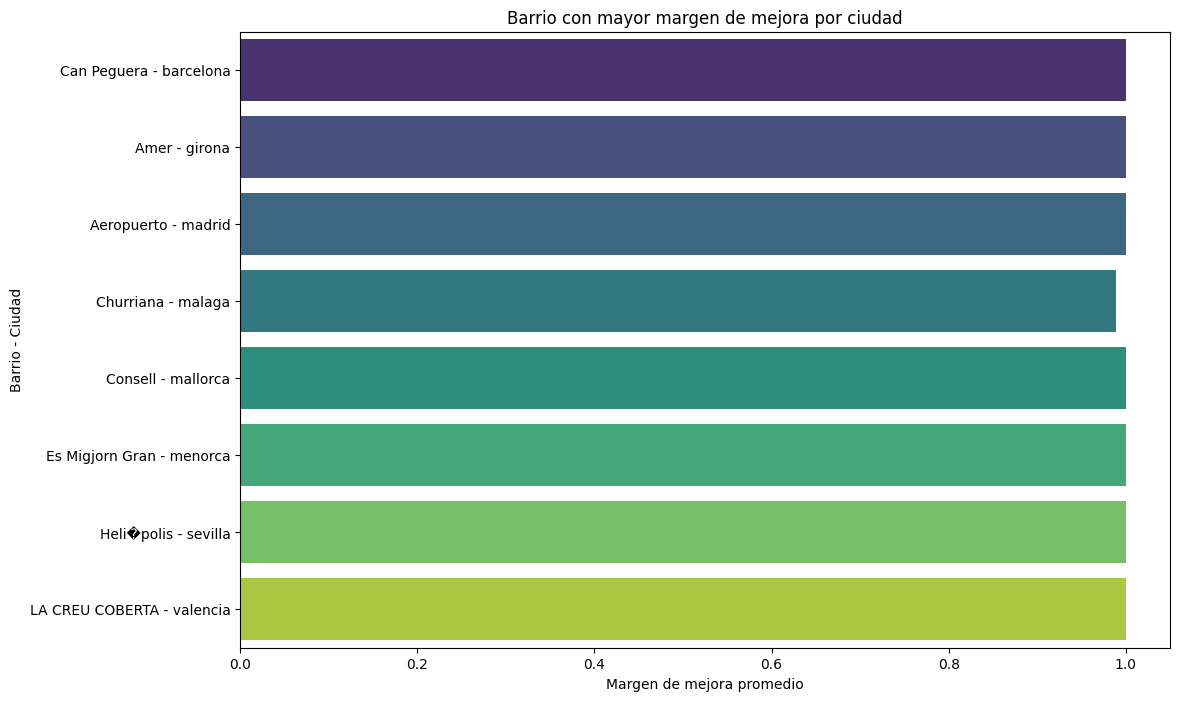

In [91]:
# Crear una columna con el barrio y el nombre de la ciudad separados por un guion
top_neighbourhoods_per_city['neighbourhood_with_city'] = top_neighbourhoods_per_city['neighbourhood_name'] + ' - ' + top_neighbourhoods_per_city['city']

# Graficar
plt.figure(figsize=(12, 8))

# Graficamos el gráfico de barras para los barrios con el mayor margen de mejora por ciudad
sns.barplot(x='margin_for_improvement', y='neighbourhood_with_city', data=top_neighbourhoods_per_city, palette='viridis')

# Título y etiquetas
plt.title('Barrio con mayor margen de mejora por ciudad')
plt.xlabel('Margen de mejora promedio')
plt.ylabel('Barrio - Ciudad')

# Mostrar el gráfico
plt.show()
